In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("../dataset/anime.csv")
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [3]:
df1 = pd.read_csv("../dataset/anime_with_synopsis.csv")
df1.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [4]:
df["Engagement_Score"] = (df["Completed"]*3 + df["Watching"]*2 + df["Plan to Watch"]*1 + df["On-Hold"]*-1 + df["Dropped"]*-2)/5
df["Engagement_Score"]

0        514206.0
1        137554.8
2        236461.0
3         32987.4
4          4727.6
           ...   
17557        70.8
17558      1399.2
17559      2262.4
17560       279.2
17561        61.8
Name: Engagement_Score, Length: 17562, dtype: float64

In [5]:
df = df.drop(columns =["Watching", "Completed", "Plan to Watch", "On-Hold", "Dropped", "Score-10", "Score-9", "Score-8", "Score-7", "Score-6",
                      "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "English name", "Japanese name", "Premiered", "Members", "Favorites"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAL_ID            17562 non-null  int64  
 1   Name              17562 non-null  object 
 2   Score             17562 non-null  object 
 3   Genres            17562 non-null  object 
 4   Type              17562 non-null  object 
 5   Episodes          17562 non-null  object 
 6   Aired             17562 non-null  object 
 7   Producers         17562 non-null  object 
 8   Licensors         17562 non-null  object 
 9   Studios           17562 non-null  object 
 10  Source            17562 non-null  object 
 11  Duration          17562 non-null  object 
 12  Rating            17562 non-null  object 
 13  Ranked            17562 non-null  object 
 14  Popularity        17562 non-null  int64  
 15  Engagement_Score  17562 non-null  float64
dtypes: float64(1), int64(2), object(13)
memo

In [6]:
df = df[df["Score"] != "Unknown"]
df = df[df["Ranked"] != "Unknown"]

In [7]:
df["Final_Score"] = (df["Score"].astype(float) + df["Engagement_Score"]) / df["Ranked"].astype(float)
df = df.drop(columns =["Score", "Engagement_Score", "Ranked", "Episodes", "Aired", "Licensors", "Duration"])

In [8]:
df.head()

,MAL_ID,Name,Genres,Type,Producers,Studios,Source,Rating,Popularity,Final_Score
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),39,18364.813571
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),518,865.177296
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,201,888.982105
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,Original,PG-13 - Teens 13 or older,1467,13.298940
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4369,1.276167


In [9]:
df = df[df['Producers'] != 'Unknown']
df = df[df['Name'] != 'Unknown']
df = df[df['Genres'] != 'Unknown']
df = df[df['Studios'] != 'Unknown']
df = df[df['Source'] != 'Unknown']
df = df[df['Rating'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 17552
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MAL_ID       4987 non-null   int64  
 1   Name         4987 non-null   object 
 2   Genres       4987 non-null   object 
 3   Type         4987 non-null   object 
 4   Producers    4987 non-null   object 
 5   Studios      4987 non-null   object 
 6   Source       4987 non-null   object 
 7   Rating       4987 non-null   object 
 8   Popularity   4987 non-null   int64  
 9   Final_Score  4987 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 428.6+ KB


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


In [11]:
df1 = df1.dropna(subset=['sypnopsis'])

In [12]:
genres = []
for row in df["Genres"]:
    for genre in row.split(","):
        if genre.strip() not in genres:
            genres.append(genre.strip()) 

In [13]:
print(genres)

['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological', 'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Vampire', 'Kids', 'Parody']


In [14]:
df_combined = df.merge(
    df1[['MAL_ID', 'sypnopsis']],
    on='MAL_ID',
    how='left'
)
df['Genre+Synopsis'] = df_combined['sypnopsis'] + "|" + df_combined['Genres']
df = df.drop(columns =["Genres"])
df = df.dropna(subset=['Genre+Synopsis'])
df['Genre+Synopsis']

0       In the year 2071, humanity has colonized sever...
1       other day, another bounty—such is the life of ...
2       Vash the Stampede is the man with a $$60,000,0...
3       ches are individuals with special powers like ...
4       It is the dark century and the people are suff...
                              ...                        
4942    The compilation film will recap the anime's 59...
4970    Fourth season of Wan Jie Xian Zong .|Action, H...
4976    No synopsis information has been added to this...
4978    Concept movie for All Nippon Esthetic Associat...
4979    The story follows Rena Yukuhasahi, a reserved ...
Name: Genre+Synopsis, Length: 2066, dtype: object

In [15]:
def pipe_tokenizer(text):
    parts = text.split("|")
    
    if len(parts) == 2:
        synopsis, genres = parts
        synopsis_tokens = re.findall(r'\b[\w-]+\b', synopsis.lower())
        genre_tokens = [g.strip().lower() for g in genres.split(",")]
        return synopsis_tokens + genre_tokens
    else:
        return re.findall(r'\b[\w-]+\b', text.lower())

In [16]:
tfidf = TfidfVectorizer(
    tokenizer=pipe_tokenizer,
    stop_words='english',
    min_df=2
)
X = tfidf.fit_transform(df['Genre+Synopsis'])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


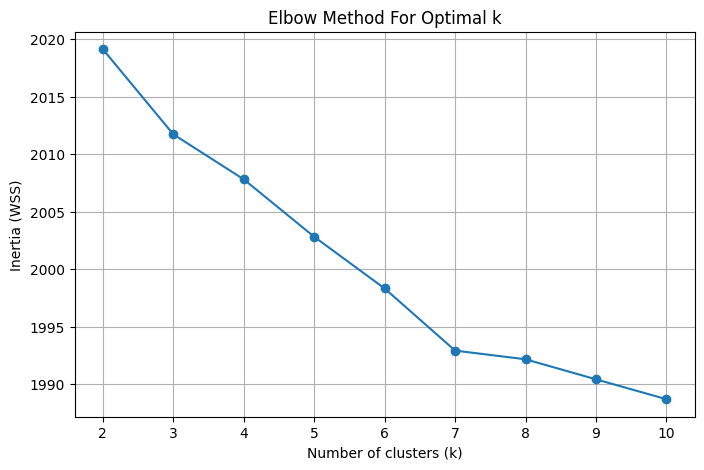

In [17]:
inertia = []
K_range = range(2, 11) 

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [18]:
k = 7 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [19]:
for i in range(k):
    print(f"\nCluster {i} Top Anime:")
    print(df[df['Cluster'] == i][['Name', 'Popularity']].head(5))


Cluster 0 Top Anime:
                                     Name  Popularity
528                                  DNA²        2688
620   JoJo no Kimyou na Bouken: Adventure        2102
655                                   Rec        1403
694                      Tokyo Godfathers         740
1025                UFO Princess Valkyrie        3936

Cluster 1 Top Anime:
                                       Name  Popularity
20                  Neon Genesis Evangelion          54
26  Rurouni Kenshin: Meiji Kenkaku Romantan         345
33               Kidou Tenshi Angelic Layer        2232
38                                     Beck         570
54                             Gakuen Alice        1640

Cluster 2 Top Anime:
                              Name  Popularity
1  Cowboy Bebop: Tengoku no Tobira         518
2                           Trigun         201
3               Witch Hunter Robin        1467
4                   Bouken Ou Beet        4369
9                          Monster     

In [20]:
df.to_csv("../dataset/mood_clustered_anime.csv", index=False)